
#  Ordinary Linear Regression models

In this notebook, we will address the problem using Ordinary linear regression models.

In an ordinary linear regression model, a continuous outcome, y, is modeled as the sum of the product of predictors and their effect. In other words, the response variable is expressed as linear combination of parameters (regression coefficients) and the predictor variables.

                            Y = B0 + B1*X1 + B2*X2 + ..Bn*Xn                            

Standard Linear Regression models makes number of assumptions about the predictor variables (independent variables), the response variables (target variable) and their relationship. See the [Wikipedia article on Linear Regression](https://en.wikipedia.org/wiki/Linear_regression#Assumptions) for an excellent list of the assumptions made by linear regression model.

#### The Line of Best Fit

![multiple_lines](images/Multiple_Lines.jpg)

We can generate infinite linear lines with various values for parameter (B0,B1,..Bn). The linear regression establishes relation between independent and dependent variable using Line of Best Fit. The Best Fit line will have our predicted values closer to actual values. In other words, the best fit line will have minimum difference between the values predicted by us and the observed values, and which is actually termed as error. 

To define and measure the error of our model we define the cost function as the sum of the squares of the residuals. The cost function is denoted by

![Cost_Function_SSR](images/Cost_Function_SSR.png)

Where h(x) is the predicted value and y is actual value. Our objective is to find the model parameters so that the cost function is minimum. 

#### Ordinary Least Squares

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients. The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. Ordinary Least Square procedure uses Gradient Descent to find optimal values.

#### Gradient Descent

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. The steps of gradient descent is outlined below.

1. We first initialize the model parameters with some random values. This is also called as random initialization.
2. Then we measure how cost function changes with change in it's parameter using partial derivatives. The parameters are updated until cost function converges to the minimum value. The rate of change of parameters is determined by α the learning parameter.

There are various techniques which tries to find best fit line. Some of the models, which are relevant to our case study are:

1. Linear Regression / Ordinary Linear Regression / Multiple Lenear Regression without regularizer parameter
2. Ridge Regression
3. Lasso Regression

Let's use LinearRegression() from sklearn.linear_model to build model based on Ordinary Least Squares technique

## Training a Linear Regression Model - Using All Features

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. 

In the initial Model we will consider all the variables

In [1]:
# Lets import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set sizes for the image
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Load the data
Housedata = pd.read_csv('Housing_Data.csv')

In [34]:
### X and y arrays
x = Housedata[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = Housedata['MEDV']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [40]:
# print the intercept
print(lm.intercept_)

41.28149654473738


In [41]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [42]:
predictions = lm.predict(x_test)

In [43]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()

,Actual,Predict
195,50.0,38.769951
4,36.2,27.392713
434,11.7,16.268056
458,14.9,16.645929
39,30.8,30.594571


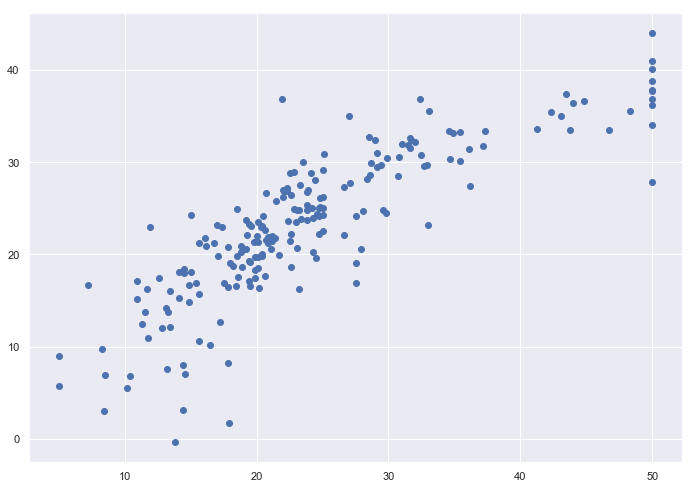

In [44]:
plt.scatter(y_test,predictions)

**Residual Histogram**

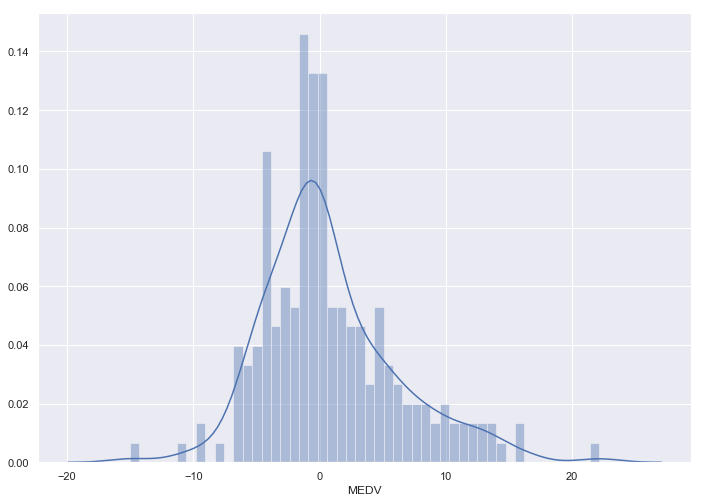

In [45]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**coefficient of determination** or **coefficient of multiple detetrmination** or **R-Square value** explains how much the total variance of the dependent variable can be reduced by using the least square regression..

**R-square** determined by

![R-Square](images/R-Square.png)

Where **SSₜ** is the total sum of errors if we take the mean of the observed values as the predicted value.

![Total Sum of Error](images/sst.png)

**SSᵣ** is the sum of the square of residuals

![Sum of Square of Residuals](images/ssr.png)

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [46]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [49]:
# model evaluation for training set
y_train_predict = lm.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('Total Sum of Errors (SSt): ', np.sum((y_train - np.mean(y_train)) ** 2))
print('Sum of Square of Residuals (SSr): ', np.sum((y_train - y_train_predict) ** 2))
print('R^2 score is {}'.format(r2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_predict))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
Total Sum of Errors (SSt):  22039.342574257425
Sum of Square of Residuals (SSr):  5506.526492883726
R^2 score is 0.7501501474315525
Adjusted R^2: 0.7389112267277815
MAE: 2.938568425643992
MSE: 18.173354761992496
RMSE is 4.263021787651629


### Inference

If we use the mean of the observed values as the predicted value the variance is 22039.34 and if we use regression the total variance is 5506.52. We reduced the prediction error by ~ 75% by using regression.


In [50]:
# model evaluation for testing set
y_test_predict = lm.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('Total Sum of Errors (SSt): ', np.sum((y_test - np.mean(y_test)) ** 2))
print('Sum of Square of Residuals (SSr): ', np.sum((y_test - y_test_predict) ** 2))
print('R2 score is {}'.format(r2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
Total Sum of Errors (SSt):  19879.028866995075
Sum of Square of Residuals (SSr):  5971.522189892925
R2 score is 0.6996069461015082
Adjusted R^2: 0.6789449900132521
MAE: 3.9051448026275124
MSE: 29.41636546745283
RMSE is 5.423685598138302


#### Inference

If we use the mean of the observed values as the predicted value the variance is 19879.02 and if we use regression the total variance is 5971.5. We reduced the prediction error by ~69% by using regression.


## Training a Linear Regression Model - Selected Features

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. 

In this model we will consider only selected features

### X and y arrays

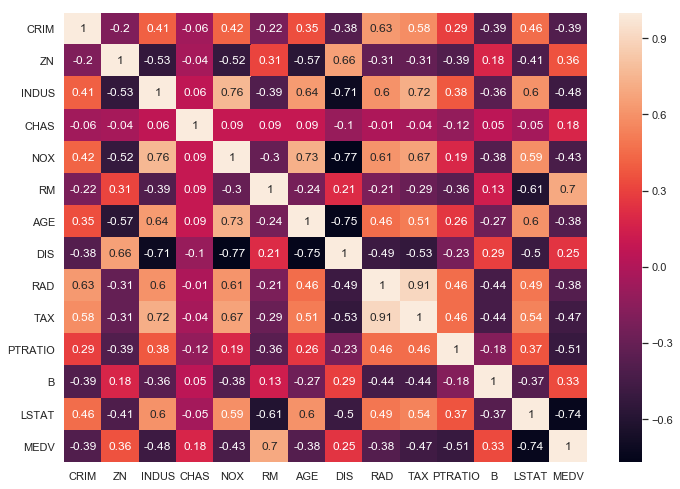

In [19]:
correlation_matrix = Housedata.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

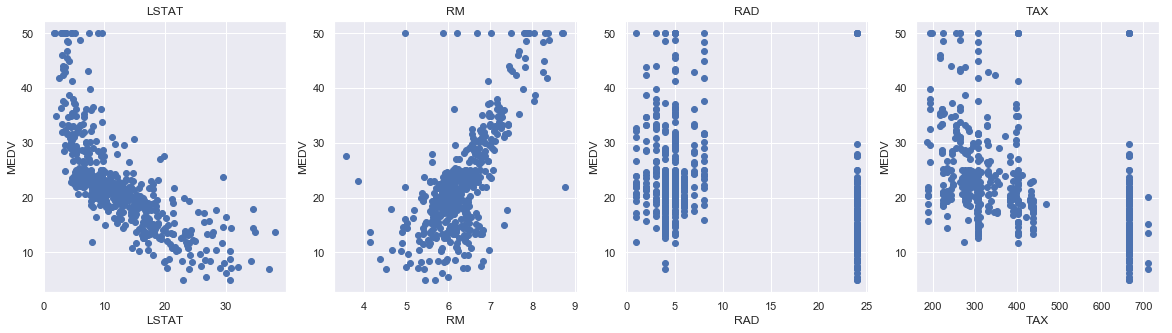

In [20]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'RAD' , 'TAX']
target = Housedata['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Housedata[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Observations:

The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

The prices tend to increase with an increase in radial highways (RAD)but it is good at median. Though it doesn’t look to be following exactly a linear line and having few outliers.

The prices tend to increase with an increase in TAX . Though it doesn’t look to be following exactly a linear line and having few outliers at 700

In [51]:
x = pd.DataFrame(np.c_[Housedata['LSTAT'], Housedata['RM'] ,Housedata['TAX'], Housedata['RAD']], columns = ['LSTAT','RM', 'TAX', 'RAD'])
y = Housedata['MEDV']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print('Trainig Data Shape: ', x_train.shape)
print('Test Data Shape: ', x_test.shape)
print('Trainig Output Shape: ', y_train.shape)
print('Test Output Shape: ', y_test.shape)

Trainig Data Shape:  (404, 4)
Test Data Shape:  (102, 4)
Trainig Output Shape:  (404,)
Test Output Shape:  (102,)


In [53]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# model evaluation for training set
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('Total Sum of Errors (SSt): ', np.sum((y_train - np.mean(y_train)) ** 2))
print('Sum of Square of Residuals (SSr): ', np.sum((y_train - y_train_predict) ** 2))
print('R2 score is {}'.format(r2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_train_predict))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train, y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('Total Sum of Errors (SSt): ', np.sum((y_test - np.mean(y_test)) ** 2))
print('Sum of Square of Residuals (SSr): ', np.sum((y_test - y_test_predict) ** 2))
print('R2 score is {}'.format(r2))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
Total Sum of Errors (SSt):  34704.28581683169
Sum of Square of Residuals (SSr):  12498.798384170394
R2 score is 0.639848563657563
Adjusted R^2: 0.6362380229423507
MAE: 3.9500202757157306
MSE: 30.937619762798004
RMSE is 5.562159631186254


The model performance for testing set
--------------------------------------
Total Sum of Errors (SSt):  7985.974607843138
Sum of Square of Residuals (SSr):  2533.5565784103596
R2 score is 0.6827492318943617
Adjusted R^2: 0.6696667259930982
MAE: 3.5951501936651855
MSE: 24.83878998441529
RMSE is 4.983852925640492
